# DATA PRE-PROCESSING

In [1]:
import pandas as pd

In [2]:
nlcd_data = "/s/chopin/e/proj/sustain/sapmitra/kubernetes_project/nlcd_vectors/nlcds_CO.csv"

df_str = pd.read_csv(nlcd_data,header=None, dtype=str)
df = pd.read_csv(nlcd_data,header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2311132023,0.000000,0.001163,0.0,0.033589,0.006839,0.000909,0.000257,0.001471,0.387878,...,0.0,0.007240,0.016506,0.0,0.0,0.0,0.482461,0.001355,0.000381,0.000000
1,3200330213,0.000000,0.015209,0.0,0.098405,0.041236,0.016624,0.006419,0.000351,0.052081,...,0.0,0.060211,0.033093,0.0,0.0,0.0,0.017485,0.180085,0.263649,0.006167
2,3200011123,0.000000,0.001005,0.0,0.036929,0.006483,0.001904,0.000908,0.000563,0.061198,...,0.0,0.000068,0.002408,0.0,0.0,0.0,0.010467,0.867964,0.008856,0.000818
3,3022002103,0.000000,0.847183,0.0,0.000000,0.000000,0.000000,0.000000,0.000628,0.006674,...,0.0,0.000924,0.000155,0.0,0.0,0.0,0.000159,0.000000,0.052829,0.003689
4,2301101333,0.000000,0.000063,0.0,0.003487,0.000123,0.000002,0.000000,0.004425,0.000149,...,0.0,0.711685,0.054617,0.0,0.0,0.0,0.000058,0.000000,0.000128,0.000928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36891,3201023331,0.012151,0.271194,0.0,0.158206,0.181085,0.084905,0.023660,0.006520,0.002670,...,0.0,0.001421,0.001147,0.0,0.0,0.0,0.001252,0.053467,0.149903,0.020634
36892,3023132102,0.000000,0.089397,0.0,0.013982,0.003667,0.000412,0.000027,0.001017,0.081444,...,0.0,0.063847,0.045406,0.0,0.0,0.0,0.000000,0.000000,0.105947,0.030323
36893,3023212223,0.000000,0.069995,0.0,0.067929,0.034112,0.011099,0.004012,0.000505,0.230754,...,0.0,0.018855,0.010888,0.0,0.0,0.0,0.238738,0.115861,0.143860,0.009394
36894,2132020200,0.000000,0.000134,0.0,0.001224,0.001485,0.000333,0.000000,0.000000,0.000127,...,0.0,0.134792,0.099027,0.0,0.0,0.0,0.004191,0.000000,0.004978,0.002220


In [3]:
quad_keys = df_str.loc[:,0]
nlcd_vectors = df.loc[:, range(1,22)]
print(nlcd_vectors.shape, quad_keys.shape)

(36896, 21) (36896,)


# TRAINING

In [4]:
import math
ck1 = int(math.sqrt(nlcd_vectors.shape[0]))
ck0 = int(ck1/10)

K = range(3,12,1)

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

distortions = []
silhouettes = []
i = ck0
for i in K:
    kmeans = KMeans(n_clusters=i, init="k-means++")#.fit(nlcd_vectors)
    kmeans.fit(nlcd_vectors)
    distortions.append(kmeans.inertia_)
    s = silhouette_score(nlcd_vectors, kmeans.labels_, metric = 'euclidean')
    silhouettes.append(s)
    print(i,s,kmeans.inertia_)

3 0.3085211597164882 7641.855318340307
4 0.3561247290970468 6026.092700773064
5 0.3812825608127654 4843.117321585535
6 0.41692826087037926 3899.279234831941
7 0.437202184852967 3348.8189025031197
8 0.4196879137470989 2960.336062320204
9 0.3883268902674014 2720.407739192546
10 0.38704176747954067 2491.7407244413284
11 0.36952653151691967 2317.7942173160814


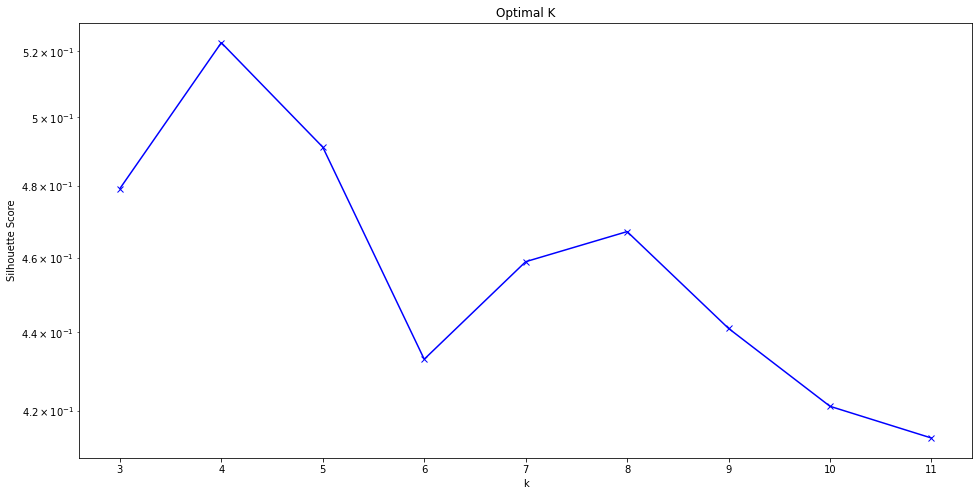

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(16,8))
#plt.plot(K, distortions, 'bx-')
plt.plot(K, silhouettes, 'bx-')
#plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.yscale("log")
plt.title('Optimal K')
plt.show()